In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from datetime import datetime, date

from scipy.fftpack import fft, ifft, fftfreq
from scipy import signal
from scipy.signal import butter, lfilter,freqs,filtfilt,sosfilt,sosfiltfilt, coherence
from numpy import hanning

In [2]:
def time_since_start(t):
    dt = datetime.strptime(t, "%d-%b-%Y %H:%M:%S")
    return np.array([dt.year, dt.month, dt.day])

def get_month_year(times):
    deltas = np.array([time_since_start(t) for t in times])
    return (deltas[:, 0], deltas[:, 1], deltas[:, 2])

def clean(df):
    temps = df.copy()[df.columns[np.hstack([np.isin(["TEMPERATURE"], el) for el in [s.split("_") for s in df.columns.values]])]]
    precip = df.copy()[df.columns[np.hstack([not np.isin(["TEMPERATURE"], el) for el in [s.split("_") for s in df.columns.values]])]]
    years, months, days = get_month_year(df["LOCAL_DATE"])
    temps["Year"] = years
    temps["Month"] = months
    temps["Day"] = days
    precip["Year"] = years
    precip["Month"] = months
    precip["Day"] = days
    
    return temps.reset_index().drop(columns="index").query("Year >= 1960").reset_index(drop=True), precip.drop(columns="LOCAL_DATE").reset_index().drop(columns="index").query("Year >= 1960").reset_index(drop=True)


In [6]:
temps, precip = clean(pd.read_csv("Canadian_climate_history.csv"))


In [8]:
cities = pd.DataFrame(temps.columns).iloc[:13, :].apply(lambda x: x.values[0].split('_')[2], axis=1).values
cities = pd.DataFrame({
    "lat": np.arange(len(cities)),
    "long": np.arange(len(cities)),
}, index=cities)
cities
canada_cities = pd.read_csv("canadacities.csv")
canada_cities["city"] = canada_cities[['city_ascii']].apply(lambda x: x.values[0].upper(), axis=1)
locs = canada_cities[canada_cities.city.isin(np.append(cities.index.values, ['SAINT JOHN', 'QUEBEC CITY']))].reset_index(drop=True)[['city', 'lat', 'lng']]


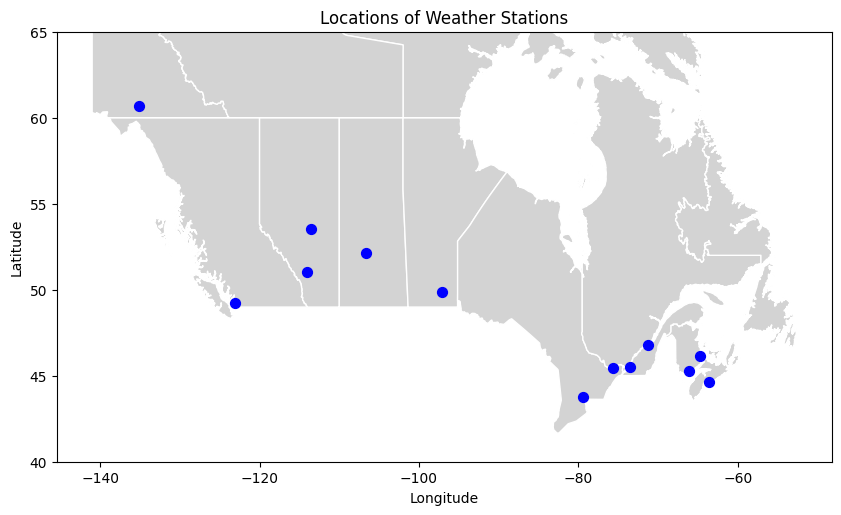

In [131]:
import geopandas as gpd

# countries = gpd.read_file(
#                'ne_10m_admin_1_states_provinces.shp')

fig, ax = plt.subplots(figsize=(10, 10))
x = locs['lng'].values
y = locs['lat'].values
t = locs['city'].values

canada = countries.query("name == 'Canada'")
canada = countries.query("iso_a2 == 'CA'")
canada.plot(ax=ax, facecolor='lightgray', edgecolor='white')
ax.scatter(data=locs, x='lng', y='lat', c='b', marker='o', s=50)

plt.title("Locations of Weather Stations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.ylim([40, 65])
plt.savefig('plots/map1.jpg', bbox_inches='tight')
plt.show()


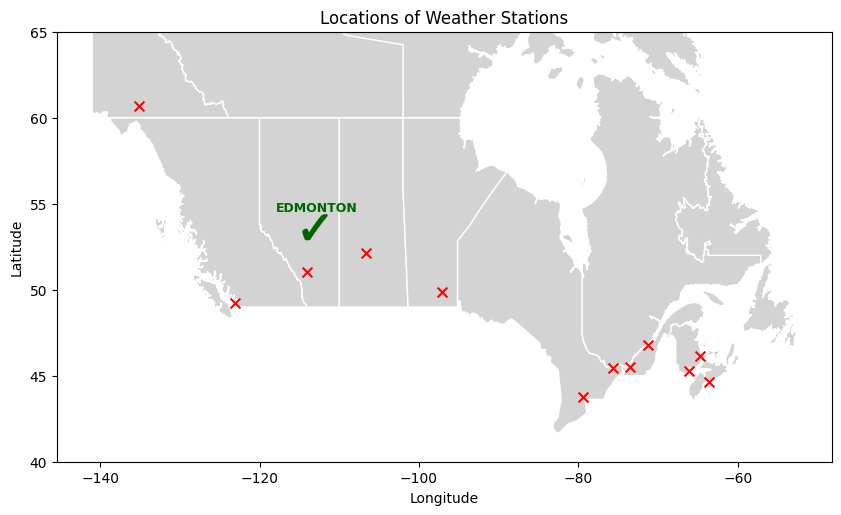

In [140]:
fig, ax = plt.subplots(figsize=(10, 10))

x = locs.query("city == 'EDMONTON'")['lng'].values[0]
y = locs.query("city == 'EDMONTON'")['lat'].values[0]
t = locs.query("city == 'EDMONTON'")['city'].values[0]
canada = countries.query("iso_a2 == 'CA'")

canada.plot(ax=ax, facecolor='lightgray', edgecolor='white')
ax.scatter(data=locs.query("city != 'EDMONTON'"), x='lng', y='lat', c='r', marker='x', s=50)
ax.scatter(x, y, c='darkgreen', marker='$\checkmark$', s=500)

plt.annotate(t, (x-4.5, y+1), color='darkgreen', fontsize=9, fontweight='semibold')
plt.title("Locations of Weather Stations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.ylim([40, 65])
plt.savefig('plots/map2.jpg', bbox_inches='tight')
plt.show()
